In [1]:
from PIL import Image

In [2]:
Image = Image.open(r"C:\Users\rames\Desktop\imdb.jpg")

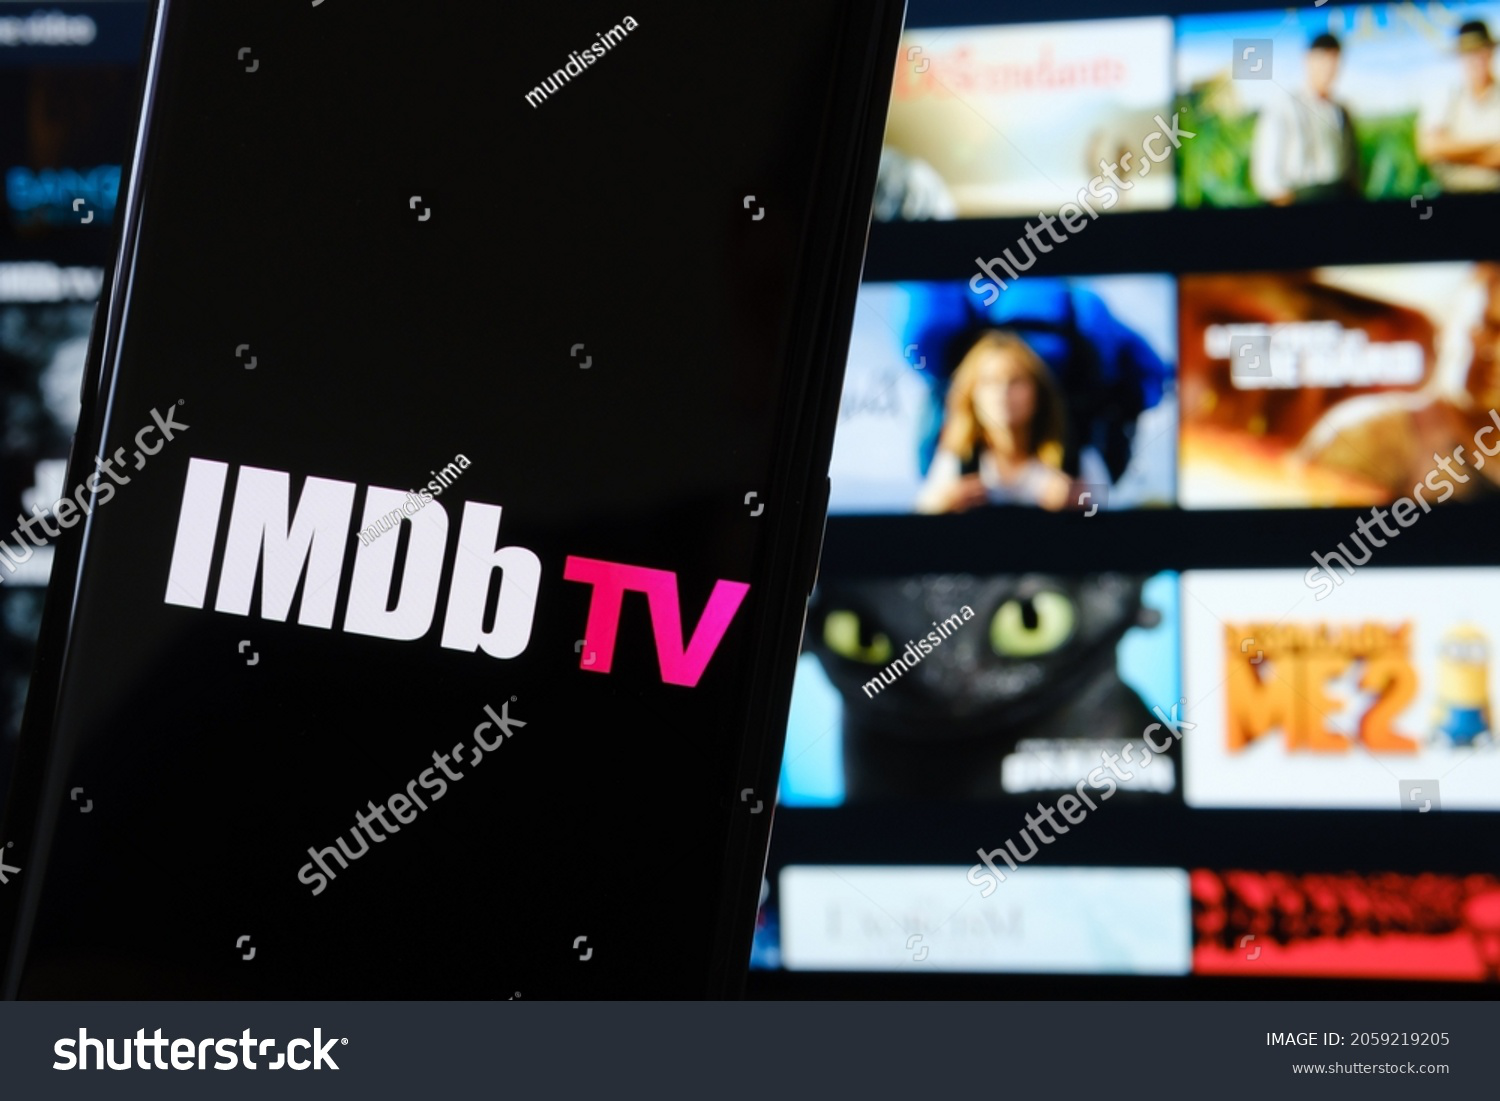

In [3]:
Image

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import chardet

In [6]:
with open(r"C:\Users\rames\Downloads\IMDb Movies India.csv.zip","rb") as file:
    data = file.read()
    print(chardet.detect(data))

{'encoding': None, 'confidence': 0.0, 'language': None}


In [7]:
df = pd.read_csv(r"C:\Users\rames\Downloads\IMDb Movies India.csv\IMDb Movies India.csv",encoding='ISO-8859-1')

In [8]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.shape

(15509, 10)

### Table info

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


## columns

In [11]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

### Drop unwanted columns

In [12]:
df.drop(columns=['Name','Actor 2','Actor 3'],inplace = True)

## Null values

In [13]:
df.isna().sum()

Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
dtype: int64

In [14]:
df.head(10)

,Year,Duration,Genre,Rating,Votes,Director,Actor 1
0,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji
1,(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
2,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta
3,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
4,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor
5,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol
6,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill
7,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN
8,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave
9,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine


In [15]:
df['Year'].mode()[0]

'(2019)'

In [16]:
df['Year'] = df['Year'].fillna(df['Year'].mode()[0])

In [17]:
df['Year'] = df['Year'].apply(lambda x : x.strip('()'))

In [18]:
df['Duration'].mode()[0]

'120 min'

In [19]:
df['Duration'] = df['Duration'].fillna(df['Duration'].mode()[0])

In [20]:
df['Genre'].mode()[0]

'Drama'

In [21]:
df['Genre'] = df['Genre'].fillna(df['Genre'].mode()[0])

In [22]:
df['Rating'].median()

6.0

In [23]:
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

In [24]:
df['Votes'].mode()[0]

'8'

In [25]:
df['Votes'] = df['Votes'].fillna(df['Votes'].mode()[0])

In [26]:
df['Director'].mode()[0]

'Jayant Desai'

In [27]:
df['Director'] = df['Director'].fillna(df['Director'].mode()[0])

In [28]:
print(f"actor_1 :: " ,df['Actor 1'].mode()[0])

actor_1 ::  Ashok Kumar


In [29]:
df['Actor 1'] = df['Actor 1'].fillna(df['Actor 1'].mode()[0])

In [30]:
df.isna().sum()

Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
dtype: int64

## Duplicates

In [31]:
df.duplicated().sum()

434

In [32]:
df[df.duplicated]

,Year,Duration,Genre,Rating,Votes,Director,Actor 1
547,1968,120 min,Drama,6.0,8,Jayant Desai,Ashok Kumar
1125,2019,120 min,Drama,6.0,8,Jayant Desai,Ashok Kumar
1145,2003,120 min,Romance,6.0,8,Jayant Desai,Ashok Kumar
1250,1979,120 min,Action,6.0,8,Master Bhagwan,Meena Rai
1251,1979,120 min,Action,6.0,8,Master Bhagwan,Meena Rai
...,...,...,...,...,...,...,...
15419,1986,120 min,Drama,6.0,8,Jayant Desai,Ashok Kumar
15430,1968,120 min,Drama,6.0,8,Jayant Desai,Ashok Kumar
15448,1937,120 min,Drama,6.0,8,Jayant Desai,Ashok Kumar
15485,1963,120 min,Drama,6.0,8,Chandrakant,Bela Bose


In [33]:
df.drop_duplicates(keep="first",ignore_index=True,inplace=True)

## Noicy Data

In [34]:
import time
for i in df.columns:
    print(df[i].unique())
    time.sleep(2)

['2019' '2021' '2010' '1997' '2005' '2008' '2012' '2014' '2004' '2016'
 '1991' '1990' '2018' '1987' '1948' '1958' '2017' '2020' '2009' '2002'
 '1993' '1946' '1994' '2007' '2013' '2003' '1998' '1979' '1951' '1956'
 '1974' '2015' '2006' '1981' '1985' '2011' '2001' '1967' '1988' '1995'
 '1959' '1996' '1970' '1976' '2000' '1999' '1973' '1968' '1943' '1953'
 '1986' '1983' '1989' '1982' '1977' '1957' '1950' '1992' '1969' '1975'
 '1947' '1972' '1971' '1935' '1978' '1960' '1944' '1963' '1940' '1984'
 '1934' '1955' '1936' '1980' '1966' '1949' '1962' '1964' '1952' '1933'
 '1942' '1939' '1954' '1945' '1961' '1965' '1938' '1941' '1931' '1937'
 '2022' '1932' '1923' '1915' '1928' '1922' '1917' '1913' '1930' '1926'
 '1914' '1924']
['120 min' '109 min' '90 min' '110 min' '105 min' '147 min' '142 min'
 '59 min' '82 min' '116 min' '96 min' '161 min' '166 min' '102 min'
 '87 min' '132 min' '66 min' '146 min' '112 min' '168 min' '158 min'
 '126 min' '94 min' '138 min' '124 min' '144 min' '157 min' '136 mi

<Axes: ylabel='Rating'>

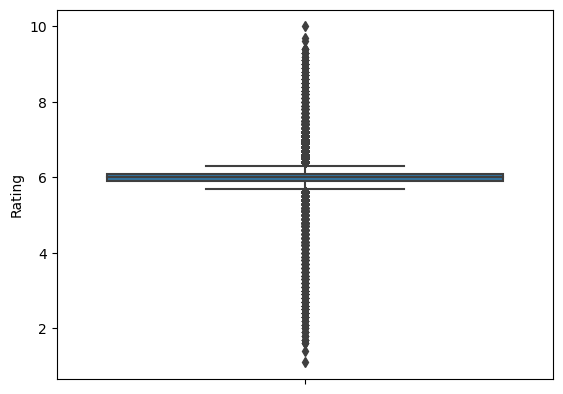

In [35]:
sns.boxplot(data = df,y = "Rating")

## Data cleaning

In [36]:
df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1
0,2019,120 min,Drama,6.0,8,J.S. Randhawa,Manmauji
1,2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
2,2021,90 min,"Drama, Musical",6.0,8,Soumyajit Majumdar,Sayani Gupta
3,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
4,2010,105 min,Drama,6.0,8,Amol Palekar,Rajat Kapoor


In [37]:
df['Duration'].unique()

array(['120 min', '109 min', '90 min', '110 min', '105 min', '147 min',
       '142 min', '59 min', '82 min', '116 min', '96 min', '161 min',
       '166 min', '102 min', '87 min', '132 min', '66 min', '146 min',
       '112 min', '168 min', '158 min', '126 min', '94 min', '138 min',
       '124 min', '144 min', '157 min', '136 min', '107 min', '113 min',
       '80 min', '122 min', '149 min', '148 min', '130 min', '121 min',
       '188 min', '115 min', '103 min', '114 min', '170 min', '100 min',
       '99 min', '140 min', '128 min', '93 min', '125 min', '145 min',
       '75 min', '111 min', '134 min', '85 min', '104 min', '92 min',
       '137 min', '127 min', '150 min', '119 min', '135 min', '86 min',
       '76 min', '70 min', '72 min', '151 min', '95 min', '52 min',
       '89 min', '143 min', '177 min', '117 min', '123 min', '154 min',
       '88 min', '175 min', '153 min', '78 min', '139 min', '133 min',
       '101 min', '180 min', '60 min', '46 min', '164 min', '162 min',
  

In [38]:
def year(value):
    value = str(value).strip("()")
    return int(value)
df['Year'] = df['Year'].apply(year)

In [39]:
df['Year'].unique()

array([2019, 2021, 2010, 1997, 2005, 2008, 2012, 2014, 2004, 2016, 1991,
       1990, 2018, 1987, 1948, 1958, 2017, 2020, 2009, 2002, 1993, 1946,
       1994, 2007, 2013, 2003, 1998, 1979, 1951, 1956, 1974, 2015, 2006,
       1981, 1985, 2011, 2001, 1967, 1988, 1995, 1959, 1996, 1970, 1976,
       2000, 1999, 1973, 1968, 1943, 1953, 1986, 1983, 1989, 1982, 1977,
       1957, 1950, 1992, 1969, 1975, 1947, 1972, 1971, 1935, 1978, 1960,
       1944, 1963, 1940, 1984, 1934, 1955, 1936, 1980, 1966, 1949, 1962,
       1964, 1952, 1933, 1942, 1939, 1954, 1945, 1961, 1965, 1938, 1941,
       1931, 1937, 2022, 1932, 1923, 1915, 1928, 1922, 1917, 1913, 1930,
       1926, 1914, 1924], dtype=int64)

In [40]:
def col(value):
    value = str(value).split(' ')
    value =  value[0]
    return int(value)
df['Duration'] = df['Duration'].apply(col)

In [41]:
df['Duration'].unique()

array([120, 109,  90, 110, 105, 147, 142,  59,  82, 116,  96, 161, 166,
       102,  87, 132,  66, 146, 112, 168, 158, 126,  94, 138, 124, 144,
       157, 136, 107, 113,  80, 122, 149, 148, 130, 121, 188, 115, 103,
       114, 170, 100,  99, 140, 128,  93, 125, 145,  75, 111, 134,  85,
       104,  92, 137, 127, 150, 119, 135,  86,  76,  70,  72, 151,  95,
        52,  89, 143, 177, 117, 123, 154,  88, 175, 153,  78, 139, 133,
       101, 180,  60,  46, 164, 162, 171, 160, 152,  62, 163, 165, 141,
       210, 129, 156, 240, 172, 155, 118, 167, 106, 193,  57, 108,  45,
       195, 174,  81, 178,  58, 184,  97,  98, 131, 176, 169,  77,  91,
        84, 173,  74,  67, 181, 300,  79,  65,  48, 183, 159,  83,  68,
        49, 201,  64, 186,  50,  69, 207,  55,  61, 185, 187, 216,  63,
        54, 198,  51,  71,  73, 218, 191, 321, 199,  53,  56, 179,  47,
       206, 190, 211, 247, 213, 223,   2, 189, 224, 202, 255, 197, 182,
       214, 208,  21, 200, 192,  37, 261, 238, 204, 235, 298, 21

In [42]:
df['Genre'].unique()

array(['Drama', 'Drama, Musical', 'Comedy, Romance',
       'Comedy, Drama, Musical', 'Drama, Romance, War', 'Documentary',
       'Horror, Mystery, Thriller', 'Action, Crime, Thriller', 'Horror',
       'Horror, Romance, Thriller', 'Comedy, Drama, Romance', 'Thriller',
       'Comedy, Drama', 'Comedy, Drama, Fantasy', 'Comedy, Drama, Family',
       'Crime, Drama, Mystery', 'Horror, Thriller', 'Biography',
       'Comedy, Horror', 'Action', 'Drama, Horror, Mystery', 'Comedy',
       'Action, Thriller', 'Drama, History', 'Drama, History, Sport',
       'Horror, Mystery, Romance', 'Horror, Mystery',
       'Drama, Horror, Romance', 'Action, Drama, History',
       'Action, Drama, War', 'Comedy, Family',
       'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'War', 'Sport',
       'Biography, Drama, History', 'Horror, Romance', 'Crime, Drama',
       'Drama, Romance', 'Adventure, Drama', 'Comedy, Mystery, Thriller',
       'Action, Crime, Drama', 'Crime

In [43]:
def split_data(df,Genre):
    df['Genre_1'] = df[Genre].str.split(',',expand=True)[0]
    df['Genre_2'] = df[Genre].str.split(',',expand = True)[1]
    df['Genre_3'] = df[Genre].str.split(',',expand = True)[2]
split_data(df,"Genre")

In [44]:
df.drop(columns="Genre",inplace=True)

In [45]:
df.head()

,Year,Duration,Rating,Votes,Director,Actor 1,Genre_1,Genre_2,Genre_3
0,2019,120,6.0,8,J.S. Randhawa,Manmauji,Drama,None,None
1,2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Drama,None,None
2,2021,90,6.0,8,Soumyajit Majumdar,Sayani Gupta,Drama,Musical,None
3,2019,110,4.4,35,Ovais Khan,Prateik,Comedy,Romance,None
4,2010,105,6.0,8,Amol Palekar,Rajat Kapoor,Drama,None,None


In [46]:
df.isna().sum()

Year            0
Duration        0
Rating          0
Votes           0
Director        0
Actor 1         0
Genre_1         0
Genre_2      8874
Genre_3     11835
dtype: int64

In [47]:
df['Genre_2'].mode()[0]

' Drama'

In [48]:
df['Genre_2'] = df['Genre_2'].fillna(df['Genre_2'].mode()[0])

In [49]:
def fun(value):
    value = str(value).lstrip()
    return value
df['Genre_2'] = df['Genre_2'].apply(fun)

In [50]:
df['Genre_2'].unique()

array(['Drama', 'Musical', 'Romance', 'Mystery', 'Crime', 'Thriller',
       'Horror', 'History', 'Family', 'Sci-Fi', 'Sport', 'Comedy',
       'Adventure', 'Biography', 'Fantasy', 'Music', 'Action', 'War',
       'News', 'Reality-TV', 'Short', 'Western'], dtype=object)

In [51]:
df['Genre_3'].mode()[0]

' Drama'

In [52]:
df['Genre_3'] = df['Genre_3'].fillna(df['Genre_3'].mode()[0])

In [53]:
df['Genre_3'] = df['Genre_3'].apply(fun)

In [54]:
df['Genre_3'].unique()

array(['Drama', 'Musical', 'War', 'Thriller', 'Romance', 'Fantasy',
       'Family', 'Mystery', 'Sport', 'History', 'Music', 'Comedy',
       'Crime', 'Horror', 'Sci-Fi', 'Adventure', 'News', 'Western',
       'Action', 'Biography'], dtype=object)

In [55]:
df.head()

,Year,Duration,Rating,Votes,Director,Actor 1,Genre_1,Genre_2,Genre_3
0,2019,120,6.0,8,J.S. Randhawa,Manmauji,Drama,Drama,Drama
1,2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Drama,Drama,Drama
2,2021,90,6.0,8,Soumyajit Majumdar,Sayani Gupta,Drama,Musical,Drama
3,2019,110,4.4,35,Ovais Khan,Prateik,Comedy,Romance,Drama
4,2010,105,6.0,8,Amol Palekar,Rajat Kapoor,Drama,Drama,Drama


In [56]:
df[df['Votes']== '$5.16M']

,Year,Duration,Rating,Votes,Director,Actor 1,Genre_1,Genre_2,Genre_3
9265,2006,120,6.0,$5.16M,Raman Bharadwaj,Kim Sharma,Comedy,Drama,Drama


In [57]:
df['Votes'] = df['Votes'].replace('$5.16M','8')

In [58]:
def votes(value):
    value = str(value).replace(',','')
    return int(value)
df['Votes'] = df['Votes'].apply(votes)

In [59]:
df['Votes'].unique()

array([    8,    35,   827, ..., 70344,   408,  1496], dtype=int64)

In [60]:
df.head()

,Year,Duration,Rating,Votes,Director,Actor 1,Genre_1,Genre_2,Genre_3
0,2019,120,6.0,8,J.S. Randhawa,Manmauji,Drama,Drama,Drama
1,2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Drama,Drama,Drama
2,2021,90,6.0,8,Soumyajit Majumdar,Sayani Gupta,Drama,Musical,Drama
3,2019,110,4.4,35,Ovais Khan,Prateik,Comedy,Romance,Drama
4,2010,105,6.0,8,Amol Palekar,Rajat Kapoor,Drama,Drama,Drama


## Data Vizulazation

### These are Top 10 Directors3

In [61]:
Top_dir = df['Director'].value_counts()[0:10]
print(Top_dir)

Director
Jayant Desai            243
Kanti Shah               56
Babubhai Mistry          50
Mahesh Bhatt             48
Nanabhai Bhatt           46
Dhirubhai Desai          46
B.R. Ishara              44
Mohammed Hussain         44
David Dhawan             44
Hrishikesh Mukherjee     42
Name: count, dtype: int64


<Axes: xlabel='Rating', ylabel='Density'>

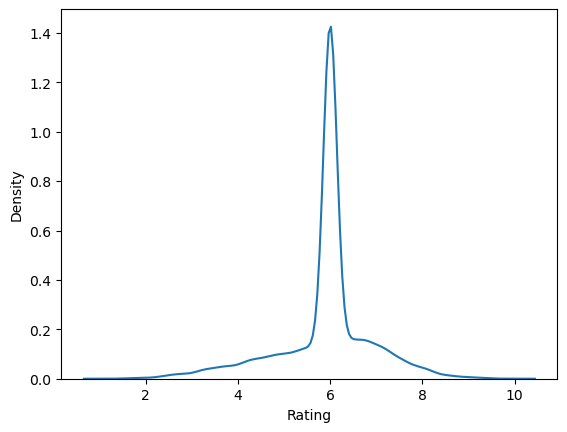

In [62]:
sns.kdeplot(data = df,x = 'Rating')

* The density plot reveals that the ratings are highly concentrated around 6, indicating that the majority of ratings fall close
* to this value,with fewer ratings at the extremes.

<Axes: >

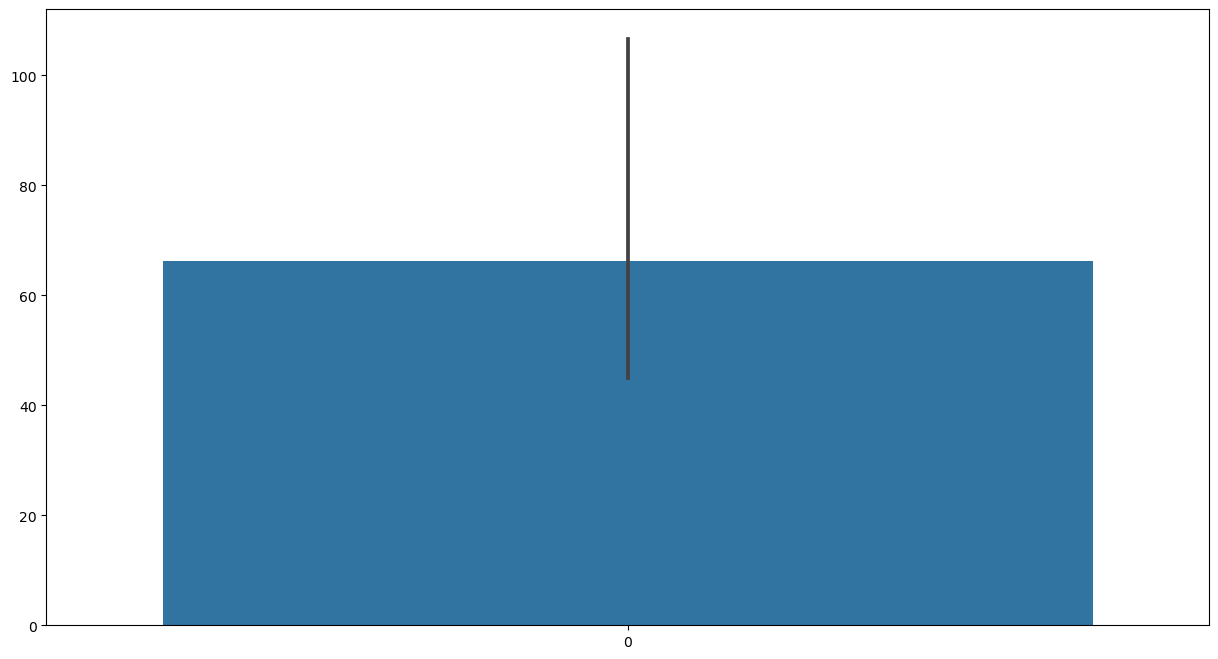

In [63]:
plt.figure(figsize=(15,8))
sns.barplot(data = Top_dir)

* The bar plot shows that all the data points are centered around a single value, indicating a lack of variation in the dataset
* with most values clustering around a central point.

In [64]:
df['Duration'].dtype

dtype('int64')

Text(0.5, 1.0, 'Duration of Movie')

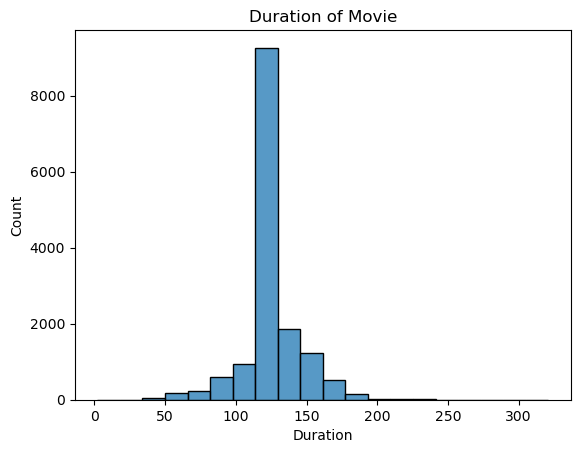

In [65]:
sns.histplot(data = df,x = "Duration",bins=20)
plt.title("Duration of Movie")

* The histogram indicates that most movies have a duration around 100 minutes, with a sharp peak in this range 
* There are fewer movies with significantly shorter or longer durations.

In [66]:
df['Rating'].dtype

dtype('float64')

<Axes: xlabel='Rating', ylabel='Density'>

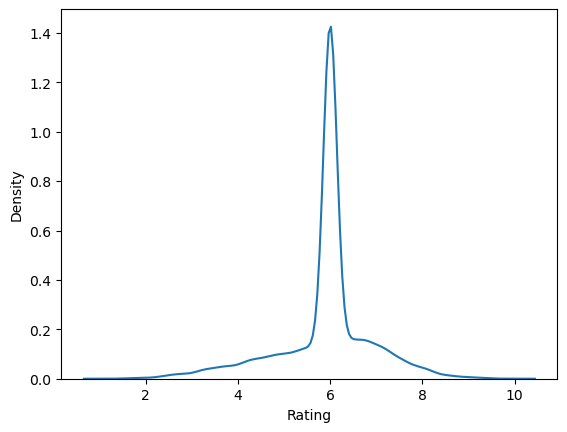

In [67]:
sns.kdeplot(data = df,x = "Rating")

* The density plot shows a highly skewed distribution with a peak near 6, indicating most ratings are concentrated
* around that value.

In [68]:
df['Votes'].dtype

dtype('int64')

<Axes: xlabel='Votes', ylabel='Count'>

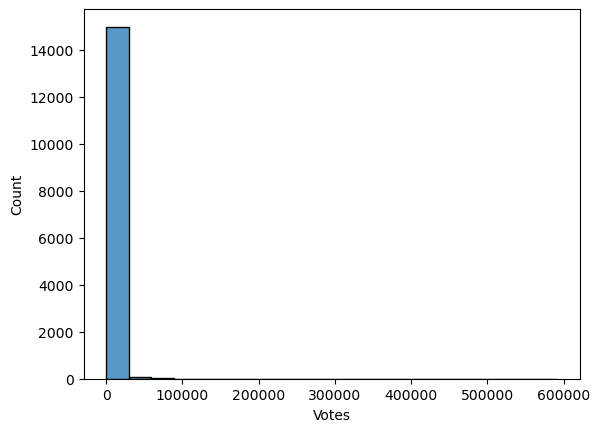

In [69]:
sns.histplot(data = df,x = "Votes",bins=20)

* The histogram shows a right-skewed distribution with a majority of votes concentrated near zero. There are a few outliers
* with significantly higher vote counts.

In [70]:
Top_act = df['Actor 1'].value_counts()[0:10]
print(Top_act)

Actor 1
Ashok Kumar           1378
Jeetendra              140
Dharmendra             140
Mithun Chakraborty     133
Amitabh Bachchan       129
Rajesh Khanna          122
Dev Anand               93
Shashi Kapoor           91
Akshay Kumar            88
Sanjeev Kumar           83
Name: count, dtype: int64


<Axes: >

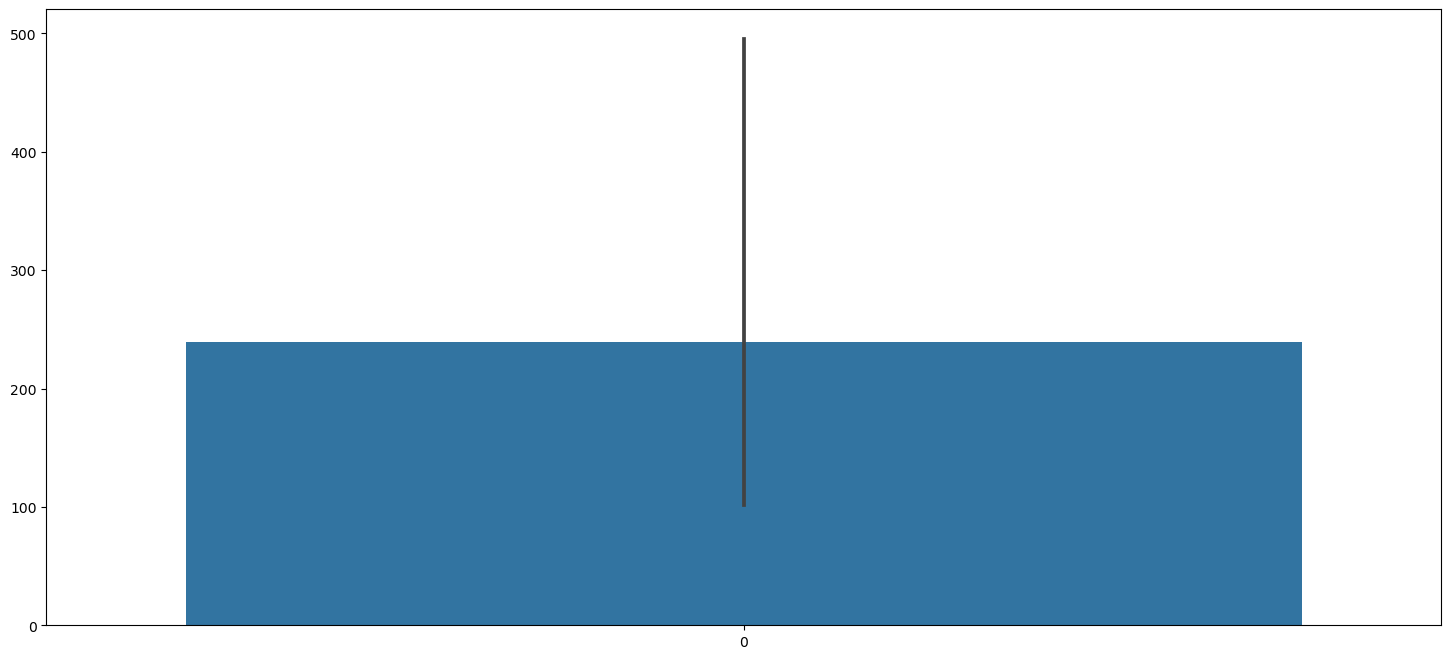

In [71]:
plt.figure(figsize=(18,8))
sns.barplot(data = Top_act)

* The box plot indicates a relatively small range of data with a median value of 0. There is a single outlier significantly 
* above the upper quartile.

## Year wise Top 5 count

In [72]:
Top_count = df['Year'].value_counts()[0:5]
print(Top_count)

Year
2019    910
2021    392
2018    381
2017    360
2020    320
Name: count, dtype: int64


In [73]:
df.columns

Index(['Year', 'Duration', 'Rating', 'Votes', 'Director', 'Actor 1', 'Genre_1',
       'Genre_2', 'Genre_3'],
      dtype='object')

In [74]:
df['Director_rating']= round(df.groupby('Director')['Rating'].transform('mean'), 1)

In [75]:
df.head()

,Year,Duration,Rating,Votes,Director,Actor 1,Genre_1,Genre_2,Genre_3,Director_rating
0,2019,120,6.0,8,J.S. Randhawa,Manmauji,Drama,Drama,Drama,5.8
1,2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Drama,Drama,Drama,7.0
2,2021,90,6.0,8,Soumyajit Majumdar,Sayani Gupta,Drama,Musical,Drama,6.0
3,2019,110,4.4,35,Ovais Khan,Prateik,Comedy,Romance,Drama,4.4
4,2010,105,6.0,8,Amol Palekar,Rajat Kapoor,Drama,Drama,Drama,6.3


In [76]:
df["Actor_rating"] = round(df.groupby(by = "Actor 1")['Rating'].transform("mean"),1)

In [77]:
df["Genre1_rating"] = round(df.groupby(by = "Genre_1")['Rating'].transform('mean'),1)

In [78]:
df["Genre2_rating"] = round(df.groupby(by = "Genre_2")['Rating'].transform('mean'),1)

In [79]:
df["Genre3_rating"] = round(df.groupby(by = "Genre_3")['Rating'].transform('mean'),1)

In [80]:
df.head()

,Year,Duration,Rating,Votes,Director,Actor 1,Genre_1,Genre_2,Genre_3,Director_rating,Actor_rating,Genre1_rating,Genre2_rating,Genre3_rating
0,2019,120,6.0,8,J.S. Randhawa,Manmauji,Drama,Drama,Drama,5.8,6.0,6.1,6.0,5.9
1,2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Drama,Drama,Drama,7.0,6.8,6.1,6.0,5.9
2,2021,90,6.0,8,Soumyajit Majumdar,Sayani Gupta,Drama,Musical,Drama,6.0,6.3,6.1,6.3,5.9
3,2019,110,4.4,35,Ovais Khan,Prateik,Comedy,Romance,Drama,4.4,5.4,5.9,5.8,5.9
4,2010,105,6.0,8,Amol Palekar,Rajat Kapoor,Drama,Drama,Drama,6.3,6.8,6.1,6.0,5.9


In [81]:
df.drop(columns=['Votes','Actor 1','Genre_1','Genre_2','Genre_3','Director'],inplace=True)

In [82]:
df.head()

,Year,Duration,Rating,Director_rating,Actor_rating,Genre1_rating,Genre2_rating,Genre3_rating
0,2019,120,6.0,5.8,6.0,6.1,6.0,5.9
1,2019,109,7.0,7.0,6.8,6.1,6.0,5.9
2,2021,90,6.0,6.0,6.3,6.1,6.3,5.9
3,2019,110,4.4,4.4,5.4,5.9,5.8,5.9
4,2010,105,6.0,6.3,6.8,6.1,6.0,5.9


## Seggregate Inputs and outputs

In [83]:
X = df.drop(columns='Rating')

y = df['Rating']

## Split the Data into Train and Test

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [86]:
print(X_train.shape,y_train.shape)

(12060, 7) (12060,)


In [87]:
print(X_test.shape,y_test.shape)

(3015, 7) (3015,)


## Data Preparation

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
scaler = StandardScaler()

In [90]:
X_train_transformed = pd.DataFrame(scaler.fit_transform(X_train),columns=scaler.get_feature_names_out(),
                                   index = X_train.index)

In [91]:
X_test_transformed = pd.DataFrame(scaler.transform(X_test),columns=scaler.get_feature_names_out(),
                                  index = X_test.index)

## Model Building

## A. Linear Regression

In [92]:
from sklearn. linear_model import LinearRegression

In [93]:
linear = LinearRegression()

In [94]:
linear.fit(X_train_transformed,y_train)

LinearRegression()

In [95]:
y_train_pred = linear.predict(X_train_transformed)

In [96]:
y_test_pred = linear.predict(X_test_transformed)

In [97]:
from sklearn import metrics

## Evalution

In [98]:
LR = metrics.mean_absolute_error(y_train_pred,y_train)
LR

0.39154526710546067

In [99]:
LR = metrics.mean_absolute_error(y_test_pred,y_test)
LR

0.3876068500825325

## B. KNN

In [100]:
from sklearn.neighbors import KNeighborsRegressor

In [101]:
regressor = KNeighborsRegressor()

In [102]:
regressor.fit(X_train_transformed,y_train)

KNeighborsRegressor()

In [103]:
y_train_pred = regressor.predict(X_train_transformed)

In [104]:
y_test_pred = regressor.predict(X_test_transformed)

## Evalution

In [105]:
KNN = metrics.mean_absolute_error(y_train_pred,y_train)
KNN

0.3114560530679934

In [106]:
KNN = metrics.mean_absolute_error(y_test_pred,y_test)
KNN

0.3825605306799337

## C. Decission Tree

In [107]:
from sklearn.tree import DecisionTreeRegressor

In [108]:
tree = DecisionTreeRegressor()

In [109]:
tree.fit(X_train_transformed,y_train)

DecisionTreeRegressor()

In [110]:
y_train_pred = tree.predict(X_train_transformed)

In [111]:
y_test_pred = tree.predict(X_test_transformed)

## Evalution

In [112]:
DT = metrics.mean_absolute_error(y_train_pred,y_train)
DT

0.0042424095063529595

In [113]:
DT = metrics.mean_absolute_error(y_test_pred,y_test)
DT

0.47956577180929105

## D. Random Forest

In [114]:
from sklearn.ensemble import RandomForestRegressor

In [115]:
forest = RandomForestRegressor()

In [116]:
forest.fit(X_train_transformed,y_train)

RandomForestRegressor()

In [117]:
y_train_pred = forest.predict(X_train_transformed)

In [118]:
y_test_pred = forest.predict(X_test_transformed)

## Evalution

In [119]:
RF = metrics.mean_absolute_error(y_train_pred,y_train)
RF

0.13380943403453008

In [120]:
RF = metrics.mean_absolute_error(y_test_pred,y_test)
RF

0.3525505533322421

## E. Support Vector Machine(SVM)

In [121]:
from sklearn.svm import SVR

In [122]:
model = SVR()

In [123]:
model.fit(X_train_transformed,y_train)

SVR()

In [124]:
y_train_pred = model.predict(X_train_transformed)

In [125]:
y_test_pred = model.predict(X_test_transformed)

## Evalution

In [126]:
SVM = metrics.mean_absolute_error(y_train_pred,y_train)
SVM

0.3339835023574775

In [127]:
SVM = metrics.mean_absolute_error(y_test_pred,y_test)
SVM

0.35707768457888045

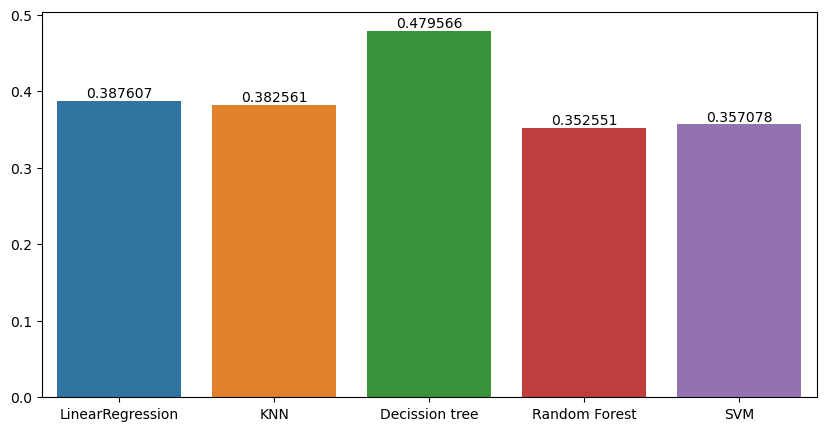

In [128]:
Algorithems = ['LinearRegression','KNN','Decission tree','Random Forest','SVM']
Accuracy = [LR,KNN,DT,RF,SVM]
plt.figure(figsize=(10,5))
ax = sns.barplot(x = Algorithems,y = Accuracy)
ax.bar_label(ax.containers[0])
plt.show()

* The bar plot shows that all five machine learning models achieved the same accuracy of 0.357078. This suggests that 
* the choice of model may not significantly impact the performance for this particular dataset.